In [ ]:
# Implement Feedforward Neural Networks with Keras and TensorFlow on CIFAR Dataset

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd

In [2]:
train_csv_path = 'Dataset/CIFAR 10/Download/cifar10_train.csv'
test_csv_path = 'Dataset/CIFAR 10/Download/cifar10_test.csv'

In [3]:
import os

def files_exist():
    return os.path.exists(train_csv_path) and os.path.exists(test_csv_path)

In [4]:
if not files_exist():
    print("Files not found. Downloading CIFAR-10 dataset...")

    cifar10 = tf.keras.datasets.cifar10
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()

    x_train_flat = x_train.reshape(x_train.shape[0], -1)
    x_test_flat = x_test.reshape(x_test.shape[0], -1)

    train_images_df = pd.DataFrame(x_train_flat)
    train_labels_df = pd.DataFrame(y_train, columns=['label'])
    test_images_df = pd.DataFrame(x_test_flat)
    test_labels_df = pd.DataFrame(y_test, columns=['label'])

    train_combined_df = pd.concat([train_images_df, train_labels_df], axis=1)
    test_combined_df = pd.concat([test_images_df, test_labels_df], axis=1)

    train_combined_df.to_csv(train_csv_path, index=False)
    test_combined_df.to_csv(test_csv_path, index=False)

    print("CIFAR-10 dataset downloaded and saved as separate CSV files.")
else:
    print("CIFAR-10 dataset files already exist. Loading from local files.")

CIFAR-10 dataset files already exist. Loading from local files.


In [5]:
# The above mentioned step is optional just to save internet 🥲

In [6]:
# You can use this method instead

# cifar10 = tf.keras.datasets.cifar10
# (x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [7]:
train_data = pd.read_csv(train_csv_path)
test_data = pd.read_csv(test_csv_path)

In [8]:
x_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values

x_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values

x_train = x_train.reshape(-1, 32, 32, 3)
x_test = x_test.reshape(-1, 32, 32, 3)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [9]:
for i in (x_train, y_train, x_test, y_test):
  print(i.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


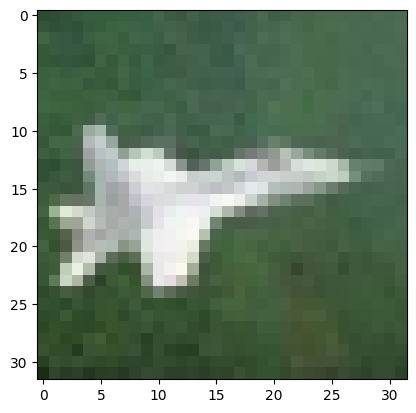

In [10]:
plt.imshow(x_train[77])
plt.show()

In [11]:
x_train = x_train / 255
x_test  = x_test / 255

In [12]:
print(x_train.shape, x_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [13]:
num_classes = 10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [14]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test  = tf.keras.utils.to_categorical(y_test,  num_classes)

In [15]:
print(y_train.shape, y_test.shape)

(50000, 10) (10000, 10)


In [16]:
from tensorflow import keras

model = keras.Sequential()

In [17]:
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))

C:\Program Files\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [19]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history = model.fit(x_train, y_train,
                    batch_size=30,
                    epochs=10,
                    validation_data=(x_test, y_test),
                    shuffle=True)

Epoch 1/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 30s 17ms/step - accuracy: 0.1941 - loss: 2.1579 - val_accuracy: 0.3297 - val_loss: 1.8916
Epoch 2/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.3590 - loss: 1.7733 - val_accuracy: 0.4433 - val_loss: 1.5325
Epoch 3/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.4547 - loss: 1.5124 - val_accuracy: 0.4932 - val_loss: 1.4180
Epoch 4/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - accuracy: 0.5083 - loss: 1.3803 - val_accuracy: 0.5331 - val_loss: 1.3237
Epoch 5/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 31s 19ms/step - accuracy: 0.5420 - loss: 1.2985 - val_accuracy: 0.5260 - val_loss: 1.3350
Epoch 6/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 31s 19ms/step - accuracy: 0.5701 - loss: 1.2262 - val_accuracy: 0.5413 - val_loss: 1.3394
Epoch 7/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 33s 20ms/step - accuracy: 0.5891 - loss: 1.1694 - val_accuracy: 0.5911 - val_loss: 1.1615
Epoch 8/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 32s 19ms/step - accuracy: 0.6084 -

<Axes: >

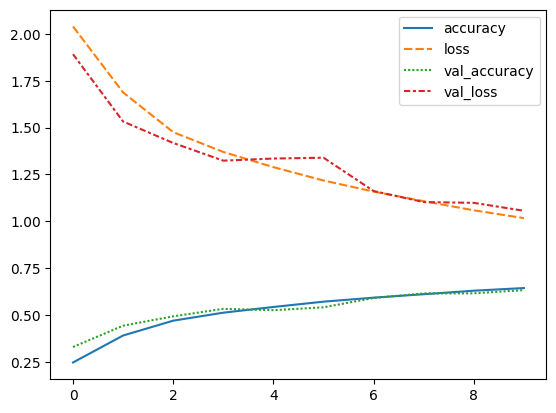

In [22]:
import seaborn as sns
sns.lineplot(model.history.history)

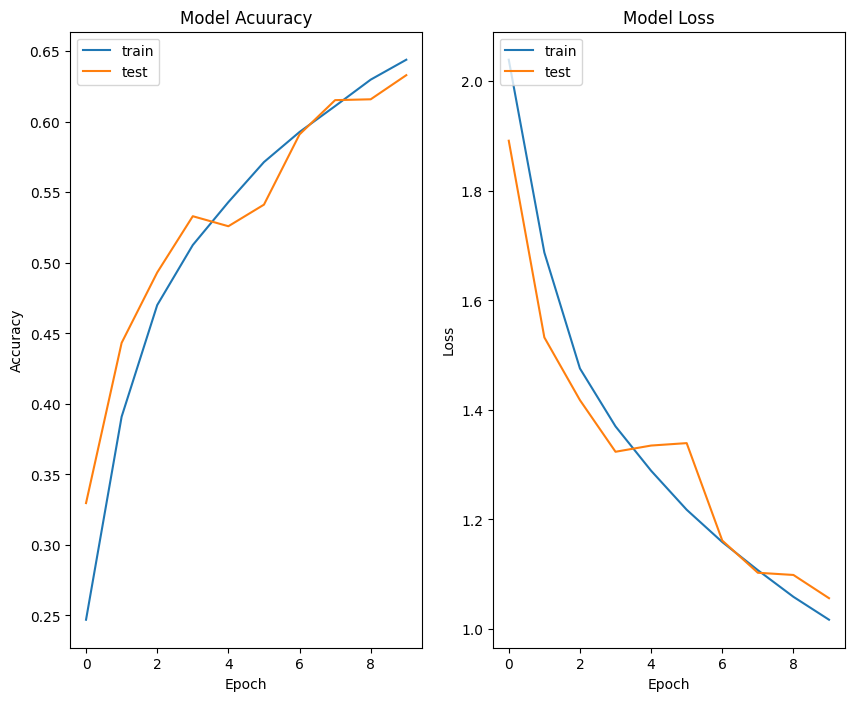

In [23]:
plt.figure(figsize=[10, 8])

# Summarize History for Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Acuuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['train', 'test'], loc='upper left')

# Summarize history for Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['train', 'test'], loc='upper left')

plt.show()

In [24]:
# Evaluate the Model

In [25]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


Text(0.5, 1.0, 'Predicted Value : dog')

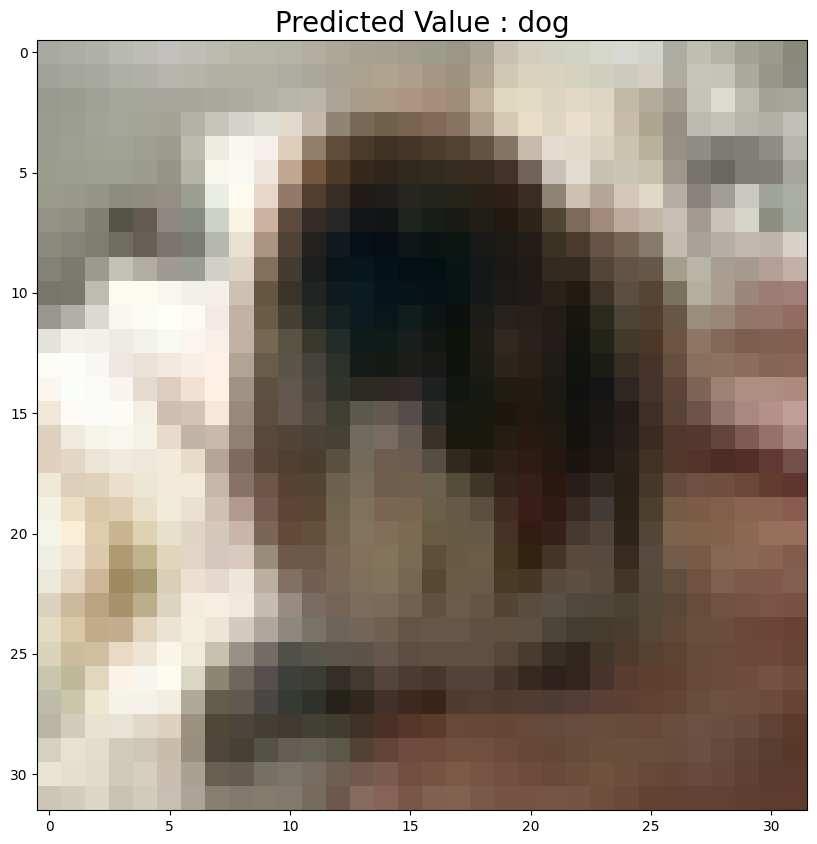

In [26]:
plt.figure(figsize=[10, 10])
plt.imshow(x_test[200].reshape(32, 32, -1))
plt.title("Predicted Value : " + str(class_names[np.argmax(predictions[200], axis=0)]), size=20)

Text(0.5, 1.0, 'Predicted Value : bird')

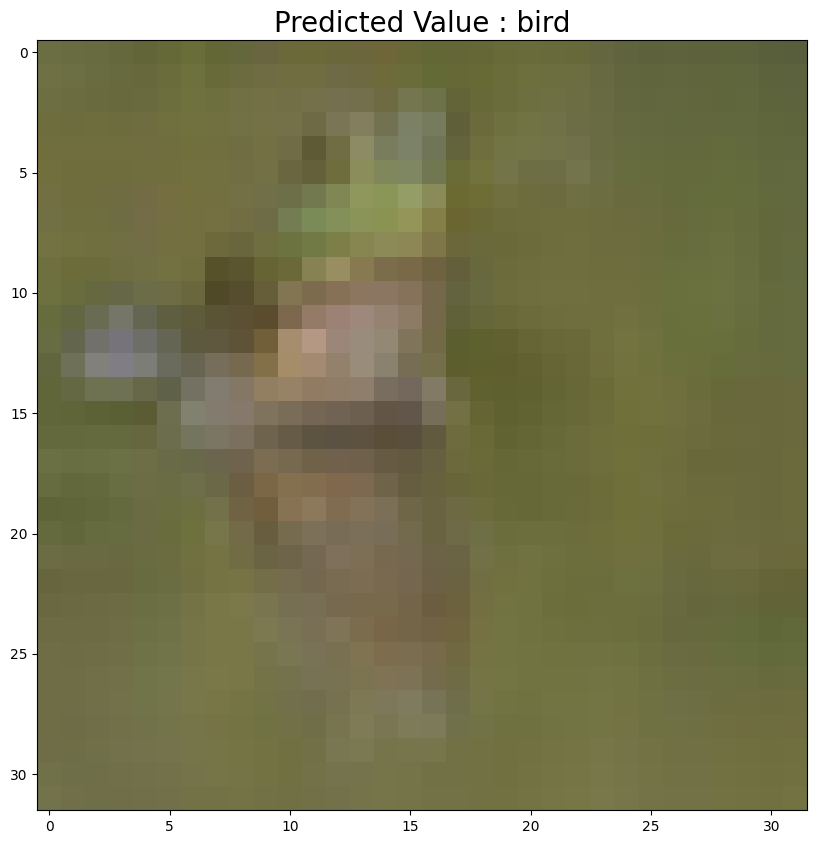

In [27]:
plt.figure(figsize=[10, 10])
plt.imshow(x_test[309].reshape(32, 32, -1))
plt.title("Predicted Value : " + str(class_names[np.argmax(predictions[309], axis=0)]), size=20)

In [28]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

313/313 - 3s - 8ms/step - accuracy: 0.6331 - loss: 1.0563
Test Loss: 1.0562752485275269
Test Accuracy: 0.6330999732017517
